In [13]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *
import timm

In [14]:
!nvidia-smi

Thu Mar 18 16:55:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:19:00.0 Off |                  N/A |
| 27%   36C    P8    23W / 250W |     10MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 28%   37C    P8    15W / 250W |     10MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [15]:
import torch
torch.cuda.set_device(1)

In [4]:
path = Path('datasetPrueba/')
trainPath = path/'train'
testPath = path/'test'

In [5]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = [Resize(presize)],
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=180,pad_mode=PadMode.Zeros), Normalize.from_stats(*imagenet_stats)])

In [6]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [7]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='efficientnet_b1'),
    MixUp(),
]

In [10]:
learn = timm_learner(dls512, 'efficientnet_b1',cbs = callbacks,metrics=[accuracy,Precision(),Recall(),RocAucBinary()]).to_fp16()

In [9]:
#learn.lr_find()

In [11]:
learn.fine_tune(100,base_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,roc_auc_score,time


RuntimeError: cuDNN error: CUDNN_STATUS_INTERNAL_ERROR

In [ ]:
path = Path('dataset/')
trainPath = path/'train'
testPath = path/'test'

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [12]:
learn.freeze()

In [14]:
learn.dls=dls512

In [14]:
#learn.load('hrnet')

SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.6309573650360107)

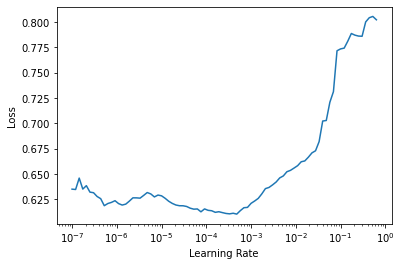

In [16]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.079952,0.762130,0.596330,0.570681,0.685535,00:13


Better model found at epoch 0 with valid_loss value: 0.762129545211792.


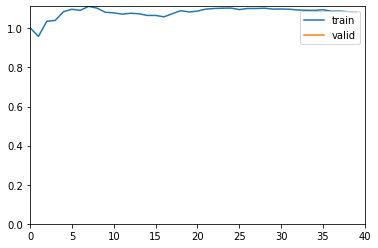

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.056624,0.756691,0.602446,0.580110,0.660377,00:15
1,1.063544,0.754340,0.594801,0.570667,0.672956,00:16
2,1.067881,0.753000,0.594801,0.568123,0.694969,00:16
3,1.056069,0.742733,0.599388,0.576503,0.663522,00:17
4,1.042149,0.740809,0.596330,0.570681,0.685535,00:18
5,1.042488,0.741267,0.584098,0.559896,0.676101,00:16
6,1.026804,0.737332,0.594801,0.571046,0.669811,00:16
7,1.026800,0.733930,0.582569,0.561983,0.641509,00:16
8,1.021577,0.726048,0.600917,0.578082,0.663522,00:15
9,1.022977,0.717763,0.597859,0.574124,0.669811,00:16


Better model found at epoch 0 with valid_loss value: 0.7566905617713928.


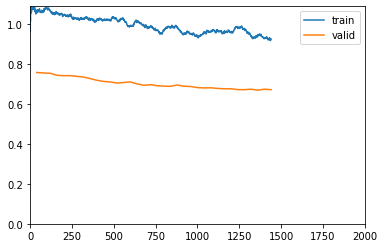

Better model found at epoch 1 with valid_loss value: 0.7543403506278992.
Better model found at epoch 2 with valid_loss value: 0.7529998421669006.
Better model found at epoch 3 with valid_loss value: 0.7427332401275635.
Better model found at epoch 4 with valid_loss value: 0.7408087253570557.
Better model found at epoch 6 with valid_loss value: 0.7373318672180176.
Better model found at epoch 7 with valid_loss value: 0.7339295744895935.
Better model found at epoch 8 with valid_loss value: 0.7260478734970093.
Better model found at epoch 9 with valid_loss value: 0.7177634835243225.
Better model found at epoch 10 with valid_loss value: 0.7120306491851807.
Better model found at epoch 11 with valid_loss value: 0.7091397643089294.
Better model found at epoch 12 with valid_loss value: 0.703909695148468.
Better model found at epoch 15 with valid_loss value: 0.6996530294418335.
Better model found at epoch 16 with valid_loss value: 0.6926243901252747.
Better model found at epoch 18 with valid_loss 

In [15]:
learn.fine_tune(50,base_lr=1e-5)

In [16]:
learn.dls = dlsTest

In [17]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5843520760536194.


(#4) [0.7186765670776367,0.5843520760536194,0.59958071278826,0.6574712643678161]